In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
path = path = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/Data%20files/automobileEDA.csv'

In [3]:
df = pd.read_csv(path)

In [4]:
df.head(3)

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1


In [20]:
df.columns

Index(['symboling', 'normalized-losses', 'make', 'aspiration', 'num-of-doors',
       'body-style', 'drive-wheels', 'engine-location', 'wheel-base', 'length',
       'width', 'height', 'curb-weight', 'engine-type', 'num-of-cylinders',
       'engine-size', 'fuel-system', 'bore', 'stroke', 'compression-ratio',
       'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price',
       'city-L/100km', 'horsepower-binned', 'diesel', 'gas'],
      dtype='object')

**1. Regresión lineal y regresión lineal múltiple**

In [5]:
#Para hacer una regresión lineal múltiple se hace así:

#Llamar la librería que calcula la regresión lineal múltiple
from sklearn.linear_model import LinearRegression

In [6]:
#Creamos un transformador que se llama lm que contiene la regresión lineal

lm = LinearRegression()
lm

LinearRegression()

In [7]:
#Voy a crear una regresión lineal con highway-mpg como X  y price como Y

X = df[['highway-mpg']]
Y = df['price']

In [8]:
#Ahora aplicamos la regresión lineal a los datos X y Y con el método fit.

lm.fit(X, Y)

LinearRegression()

In [12]:
#Ya puedo estimar el valor de precio entrando todo el frame de X

y_hat = lm.predict(X)
y_hat[0:5]

array([16236.50464347, 16236.50464347, 17058.23802179, 13771.3045085 ,
       20345.17153508])

In [14]:
#Calculando el intercepto y la pendiente

print(lm.intercept_)

print(lm.coef_)

38423.3058581574
[-821.73337832]


In [25]:
#Creando una regresión lineal que se llame lm1

lm1 = LinearRegression()

#Entrenando el modelo con X = "engine-size"

X_2 = df[["engine-size"]]
Y_2 = df["price"]

#Aquí entreno el modelo ya con X_2 y Y_2
lm1.fit(X_2, Y_2)

#Finalmente hago las estimaciones y_hat2

y_hat2 = lm1.predict(X_2)
y_hat[0:5]


array([16236.50464347, 16236.50464347, 17058.23802179, 13771.3045085 ,
       20345.17153508])

In [28]:
#Ahora encuentro la pendiente y la intersección de la recta

print("Pendiente = ", lm1.coef_)
print("\nIntersección = ", lm1.intercept_)

Pendiente =  [166.86001569]

Intersección =  -7963.338906281042


**Regresión lineal múltiple**
En la regresión que voy a usar aquí, se estiman los coerificientes A de la siguiente ecuación:

Y = A0 + A1.X1 + A2.X2 + A3.X3 + A4.X4

In [31]:
#Voy a crear un arreglo más pequeño apenas incluyendo cuatro variables de entrada

Z = df[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']]

#Para ajustar el modelo sigo exactamente los mismos pasos de la regresión lineal múltiple

lm = LinearRegression()

#Y hago el fit del modelo con Z
lm.fit(Z, df['price'])

LinearRegression()

In [34]:
#Voy a ver cómo quedan los coeficientes de las variables. Es un arreglo de 4 elementos. Voy a ver también el intercepto
print(lm.coef_)
print("\n",lm.intercept_)

[53.49574423  4.70770099 81.53026382 36.05748882]

 -15806.62462632922


Con lo anterior, la ecuación de la regresión quedaría así:

Y = -15806.6 + 53.5 X1 + 4.7 X2 + 81.5 X3 + 36.1 X4

###**2. Visualización del modelo**###

(0.0, 48159.235317612154)

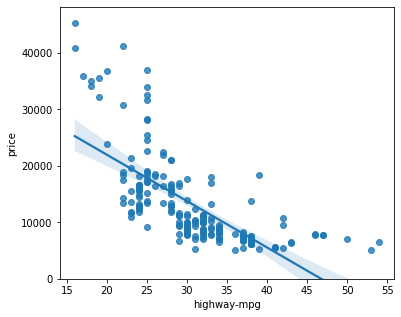

In [37]:
#Vamos a visualizar la regresiójn lineal entre highway-mpg y precio

import seaborn as sns

width = 6
height = 5
plt.figure(figsize=(width, height))
sns.regplot(x="highway-mpg", y="price", data=df)
plt.ylim(0,)

(0.0, 47414.1)

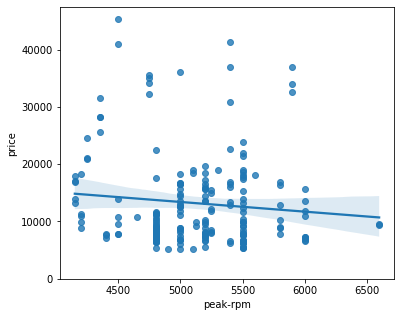

In [38]:

plt.figure(figsize=(width, height))
sns.regplot(x="peak-rpm", y="price", data=df)
plt.ylim(0,)

In [39]:
#Ahora voy a determinar qué tan fuerte es la correlación entre las variables


df[["peak-rpm","highway-mpg","price"]].corr()

,peak-rpm,highway-mpg,price
peak-rpm,1.000000,-0.058598,-0.101616
highway-mpg,-0.058598,1.000000,-0.704692
price,-0.101616,-0.704692,1.000000


###**Gráfico de los residuos**

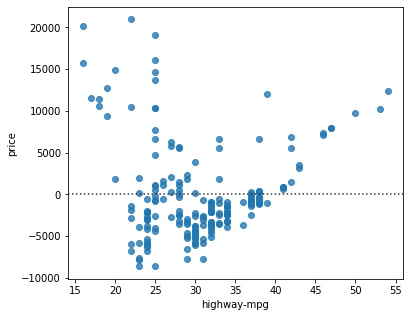

In [41]:
#Voy a graficar los residuos entre el modelo predicho y los datos reales para la regresión entre precio y highway-mpg
#La gráfica muestra que los residuos no están distribuidos normalmente al rededor de X

width = 6
height = 5
plt.figure(figsize=(width, height))
sns.residplot(x=df['highway-mpg'],y=df['price'])
plt.show()

###**Visualización de Regresión lineal múltiple**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


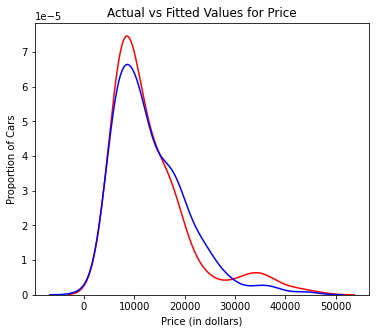

In [45]:

Y_hat2 = lm.predict(Z)

plt.figure(figsize=(width, height))


ax1 = sns.distplot(df['price'], hist=False, color="r", label="Actual Value")
sns.distplot(Y_hat2, hist=False, color="b", label="Fitted Values" , ax=ax1)


plt.title('Actual vs Fitted Values for Price')
plt.xlabel('Price (in dollars)')
plt.ylabel('Proportion of Cars')

plt.show()
plt.close()


###**Regresión polinomial**###

In [46]:
#En las siguientes líneas estoy definiendo una función que gradica una función de regresión

def PlotPolly(model, independent_variable, dependent_variabble, Name):
    x_new = np.linspace(15, 55, 100)
    y_new = model(x_new)

    plt.plot(independent_variable, dependent_variabble, '.', x_new, y_new, '-')
    plt.title('Polynomial Fit with Matplotlib for Price ~ Length')
    ax = plt.gca()
    ax.set_facecolor((0.898, 0.898, 0.898))
    fig = plt.gcf()
    plt.xlabel(Name)
    plt.ylabel('Price of Cars')

    plt.show()
    plt.close()

In [47]:
#Definimos ahora las X y Y

x = df['highway-mpg']
y = df['price']


In [48]:
# Here we use a polynomial of the 3rd order (cubic) 
f = np.polyfit(x, y, 3)
p = np.poly1d(f)
print(p)

        3         2
-1.557 x + 204.8 x - 8965 x + 1.379e+05


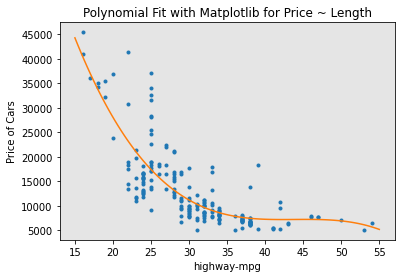

In [51]:
#Ahora graficando los datos

PlotPolly(p, x, y, 'highway-mpg')

            11             10             9           8         7
-1.243e-08 x  + 4.722e-06 x  - 0.0008028 x + 0.08056 x - 5.297 x
          6        5             4             3             2
 + 239.5 x - 7588 x + 1.684e+05 x - 2.565e+06 x + 2.551e+07 x - 1.491e+08 x + 3.879e+08


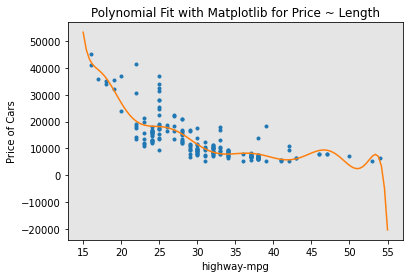

In [54]:
#Crear un modelo de grado 11 con las mismas variables del ejercicio anterior

f = np.polyfit(x, y, 11)
p = np.poly1d(f)
print(p)

#Ahora graficando los datos

PlotPolly(p, x, y, 'highway-mpg')

Es posible hacer otras transformaciones polinomiales para ajustar el modelo

In [55]:
from sklearn.preprocessing import PolynomialFeatures


In [56]:

#We create a PolynomialFeatures object of degree 2:

pr=PolynomialFeatures(degree=2)
pr

PolynomialFeatures()

In [57]:
#Aplicamos la transformación polinomial

Z_pr=pr.fit_transform(Z)

In [58]:
#Y vemos cuántos features tenía el frame original y el frame transformado con PolynomialFeatures

print(Z.shape)
print(Z_pr.shape)

(201, 4)
(201, 15)


###**Pipeline**
El pipeline aplica una serie de métodos al dataset.

In [60]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

#Aquí estoy indicando que lo que quiero hacer es: primero escalar los datos, luego aplicar una transformación para calcular los polinomial features
#y finalmente aplicar una regresión lineal.

Input=[('scale',StandardScaler()), ('polynomial', PolynomialFeatures(include_bias=False)), ('model',LinearRegression())]

In [61]:
#A este tipo de instancias se les llama constructores.

pipe=Pipeline(Input)
pipe

Pipeline(steps=[('scale', StandardScaler()),
                ('polynomial', PolynomialFeatures(include_bias=False)),
                ('model', LinearRegression())])

In [62]:
#Aquí estoy primero convirtiendo los datos de Z a float. Lo que explica el curso es que la idea 

Z = Z.astype(float)
pipe.fit(Z,y)

Pipeline(steps=[('scale', StandardScaler()),
                ('polynomial', PolynomialFeatures(include_bias=False)),
                ('model', LinearRegression())])

In [63]:
#Similarly, we can normalize the data, perform a transform and produce a prediction simultaneously.

ypipe=pipe.predict(Z)
ypipe[0:4]

array([13102.74784201, 13102.74784201, 18225.54572197, 10390.29636555])

###**5. Medidas para evaluar el modelo**

Usaremos:
- R^2 (coeficiente de determinación): el % de la variación de la variable real es explicada por el modelo.
- MSE: es la suma del cuadrado de los errores.

In [64]:
#El caso de regresión lineal múltiple. Ver que el método score calcula el R^2. Ver que el 49.7%
#de la variación observada en Y es explicada por el modelo.

#highway_mpg_fit
lm.fit(X, Y)
# Find the R^2
print('The R-square is: ', lm.score(X, Y))

The R-square is:  0.4965911884339176


In [65]:

from sklearn.metrics import mean_squared_error

Yhat=lm.predict(X)
print('The output of the first four predicted value is: ', Yhat[0:4])

mse = mean_squared_error(df['price'], Yhat)
print('The mean square error of price and predicted value is: ', mse)

The output of the first four predicted value is:  [16236.50464347 16236.50464347 17058.23802179 13771.3045085 ]
The mean square error of price and predicted value is:  31635042.944639888


In [68]:
#Vamos a hacer ahora lo mismo con la regresión lineal múltiple

#Cálculo del R^2

# fit the model 
lm.fit(Z, df['price'])
# Find the R^2
print('The R-square is: ', lm.score(Z, df['price']))


#Para calcular el MSE primero genero 

Y_predict_multifit = lm.predict(Z)

print('The mean square error of price and predicted value using multifit is: ', \
      mean_squared_error(df['price'], Y_predict_multifit))

The R-square is:  0.8093562806577457
The mean square error of price and predicted value using multifit is:  11980366.87072649


###Predicciones###

In [69]:

new_input=np.arange(1, 100, 1).reshape(-1, 1)

In [70]:
lm.fit(X, Y)
lm

LinearRegression()

In [72]:
yhat=lm.predict(new_input)
yhat[0:5]

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


array([37601.57247984, 36779.83910151, 35958.10572319, 35136.37234487,
       34314.63896655])

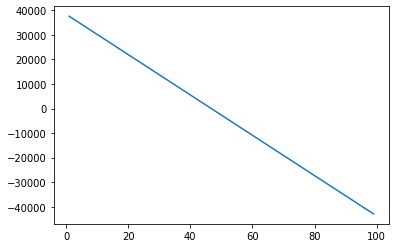

In [73]:
plt.plot(new_input, yhat)
plt.show()